In [2]:
#from noise_analysis import *
from noise_properties_plotting import *
%matplotlib inline

import matplotlib

np.random.seed(int(time.time()))

def cm2inch(value):
    return value/2.54;

from scipy.stats import kstest
from scipy import stats

def ratio(x):
    x = x[:-1]/x[1:]
    x = x[np.isfinite(x)]
    return x

def fit_ratio(x):
    # Return the parameters of the fit and the goodness of fit values

    x = x[:-1]/x[1:]
    x = x[np.isfinite(x)]
    x = x[x>0]
    
    if len(x) > 10:
        a, b, c = stats.lognorm.fit(x,floc=0)
        stat, pval = kstest(x, 'lognorm', args=((a,b,c)))
    else:
        return np.nan, np.nan, np.nan, np.nan, np.nan
    return a, b, c, stat, pval

def cm2inch(value):
    return value/2.54;

NameError: name 'time' is not defined

In [4]:
from elife_settings import set_elife_settings, ELIFE

set_elife_settings()

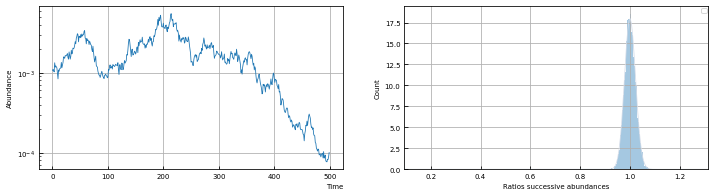

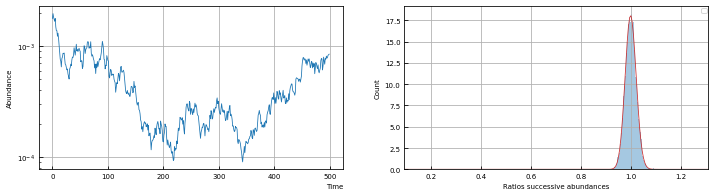

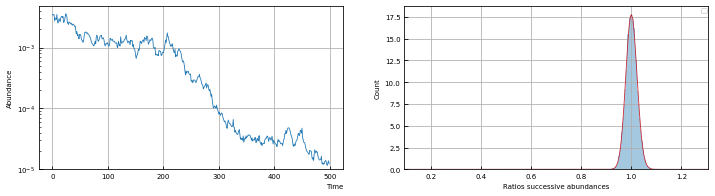

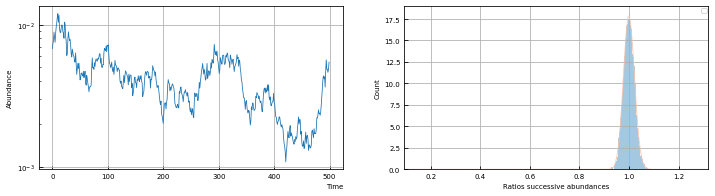

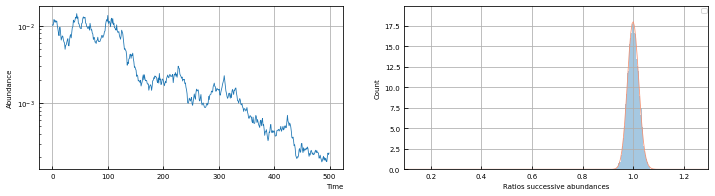

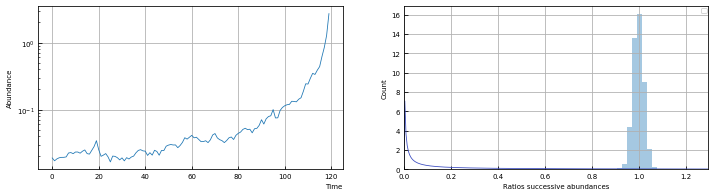

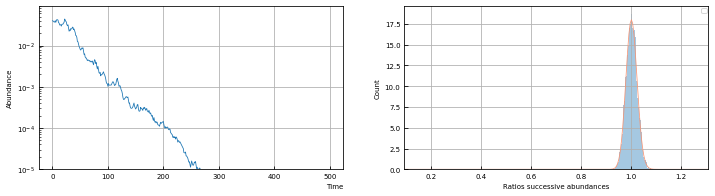

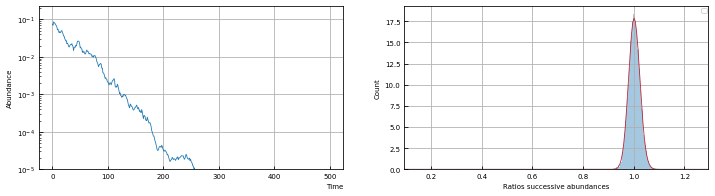

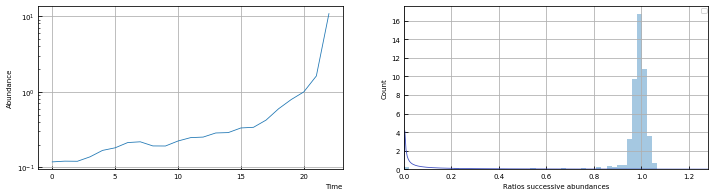

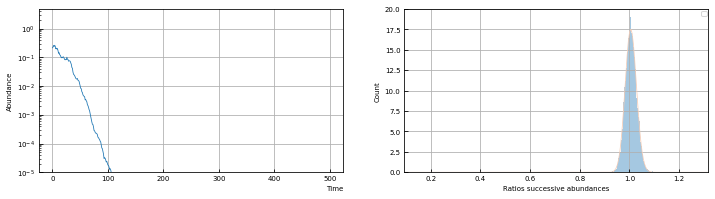

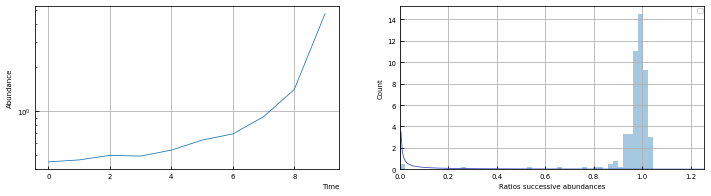

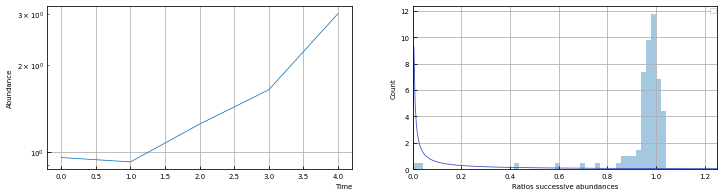

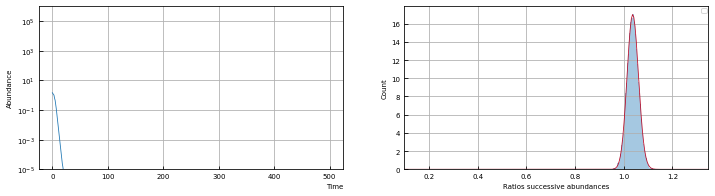

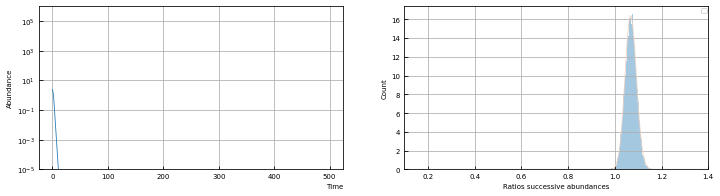

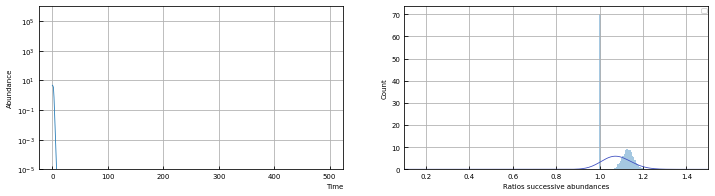

ValueError: zero-size array to reduction operation fmin which has no identity

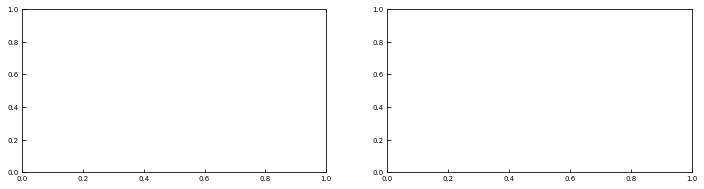

In [4]:
ss = np.logspace(-3, 2, 20)
df = pd.DataFrame({'ss' : ss})

df['a_g2'] = np.zeros(len(ss))
df['b_g2'] = np.zeros(len(ss))
df['c_g2'] = np.zeros(len(ss))

for row in df.index:
    steadystate = np.array([df.loc[row, 'ss']]).reshape([1,1])
    
    params = make_params(steadystate, selfint=-0.5, noise=0.1)
    
    ts = Timeseries(params, noise_implementation = NOISE.LANGEVIN_LINEAR, 
                            dt = 0.01, tskip=4, T=500.0, seed=int(time.time())).timeseries

    x = ts['species_1'].values

    x_transf = ratio(x)

    a, b, c, stat, pval = fit_ratio(x)
    
    df.loc[row, 'a_g2'] = a
    df.loc[row, 'b_g2'] = b
    df.loc[row, 'c_g2'] = c
    df.loc[row, 'stat_g2'] = stat
    df.loc[row, 'pval_g2'] = pval
    
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    PlotTimeseriesComparison([ts], composition=['ts'], fig=ax1)

    x = ts['species_1'].values

    x_fit = np.linspace(0,5,1000)
    pdf_fitted = stats.lognorm.pdf(x_fit,a,b,c) #Gives the PDF

    ax2.hist(x_transf, alpha=0.4, normed=True, bins = 50)
    cmap = matplotlib.cm.get_cmap('coolwarm')
    c = cmap(pval)
    ax2.plot(x_fit, pdf_fitted, c=c)

    ax2.set_xlim([(0.1*min(x_transf)),min(1.2*max(x_transf), 3)])
    ax2.legend()
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Ratios successive abundances')
    ax2.grid()
    plt.show()

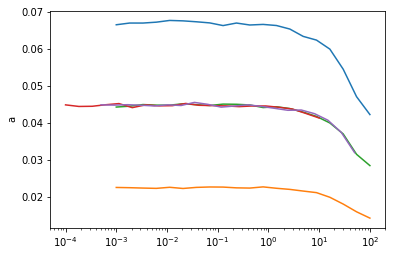

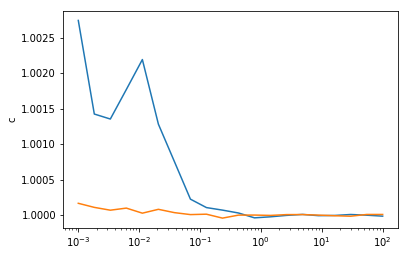

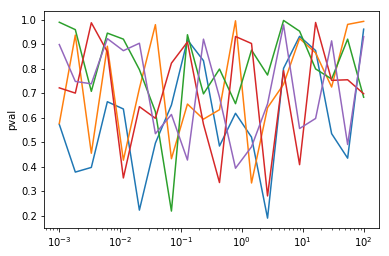

In [40]:
plt.plot(df['ss'], df['a'])
plt.plot(df['ss'], df['a_0.1'])
plt.plot(df['ss'], df['a_0.2'])
plt.plot(df['ss']*0.1, df['a_g'])
plt.plot(df['ss']*0.5, df['a_g2'])
plt.xscale('log')
plt.ylabel('a')
plt.show()

plt.plot(df['ss'], df['c'])
plt.plot(df['ss'], df['c_0.1'])
plt.xscale('log')
plt.ylabel('c')
plt.show()

plt.plot(df['ss'], df['pval'])
plt.plot(df['ss'], df['pval_0.1'])
plt.plot(df['ss'], df['pval_0.2'])
plt.plot(df['ss'], df['pval_g'])
plt.plot(df['ss'], df['pval_g2'])
plt.xscale('log')
plt.ylabel('pval')
plt.show()

In [5]:
ss = np.logspace(-3, 2, 20)
df = pd.DataFrame({'ss' : ss})

df['a'] = np.zeros(len(ss))
df['b'] = np.zeros(len(ss))
df['c'] = np.zeros(len(ss))

for row in df.index:
    params = {}

    N = 1

    steadystate = np.array([df.loc[row, 'ss']]).reshape([1,1])

    # no interaction
    omega = np.zeros([N, N]); np.fill_diagonal(omega, -1)

    params['interaction_matrix'] = omega

    # no immigration
    params['immigration_rate'] = np.zeros([N, 1])

    # different growthrates determined by the steady state
    params['growthrate'] = - (omega).dot(steadystate)

    params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)

    params['noise'] = 3e-1

    params['noise_linear'] = 1e-1
    params['noise_sqrt'] = 1e-2

    ts = Timeseries(params, noise_implementation = NOISE.LANGEVIN_LINEAR, 
                    dt = 0.01, tskip=4, T=500.0, seed=int(time.time())).timeseries

    x = ts['species_1'].values

    x_transf = ratio(x)

    a, b, c, stat, pval = fit_ratio(x)
    
    df.loc[row, 'a'] = a
    df.loc[row, 'b'] = b
    df.loc[row, 'c'] = c
    df.loc[row, 'stat'] = stat
    df.loc[row, 'pval'] = pval
    fig = plt.figure(figsize=(10,3))

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    plot_timeseries_comparison([ts], composition=['ts'], fig=ax1)

    x = ts['species_1'].values

    x_transf = ratio(x)

    a, b, c, stat, pval = fit_ratio(x)  # b = 0, c = 1

    print(a,b,c)

    x_fit = np.linspace(0,5,1000)
    pdf_fitted = stats.lognorm.pdf(x_fit,a,b,c) #Gives the PDF

    ax2.hist(x_transf, alpha=0.4, normed=True, bins = 50) #np.linspace(0,20,161))
    cmap = matplotlib.cm.get_cmap('viridis')
    c = cmap(pval)
    ax2.plot(x_fit, pdf_fitted, c=c)

    ax2.set_xlim([(0.1*min(x_transf)),min(1.2*max(x_transf), 3)])
    ax2.legend() #loc=3)
    #ax.set_yscale('log')
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Ratios successive abundances')
    ax2.grid()

NameError: name 'run_timeseries_noise' is not defined

In [9]:
ss = np.logspace(-3, 2, 50)

df = pd.DataFrame({'ss' : ss})

sigmas = [0.5, 0.7, 0.8, 1.0] #0.01, 0.1, 0.2, 0.25, 0.3]
    
for sigma in sigmas:
    df['sigma_%.2f_width_mean' % sigma] = np.zeros(len(ss))
    df['sigma_%.2f_width_std' % sigma] = np.zeros(len(ss))
    df['sigma_%.2f_pval' % sigma] = np.zeros(len(ss))
    
    for row in df.index:
        if row % 10 == 0:
            print(row)
        
        params = {}

        N = 50

        steadystate = np.repeat(df.loc[row, 'ss'], N).reshape([N,1])

        # no interaction
        #omega = np.zeros([N,N]); np.fill_diagonal(omega, -1)
        omega = np.random.normal(0,0.15,[N,N]); np.fill_diagonal(omega, -1)

        params['interaction_matrix'] = omega

        # no immigration
        params['immigration_rate'] = np.zeros([N, 1])

        # different growthrates determined by the steady state
        params['growthrate'] = - (omega).dot(steadystate)
        
        params['noise'] = sigma

        multi_a = np.zeros(10)
        multi_pval = np.zeros(10)
        
        params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)


        ts = Timeseries(params, noise_implementation = NOISE.LANGEVIN_LINEAR, 
                            dt = 0.01, tskip=4, T=500.0, seed=int(time.time())).timeseries
        
        multi_a = np.zeros(N)
        multi_pval = np.zeros(N)
        
        for i in range(N):
            x = ts['species_%d' % (i+1)].values

            x_transf = ratio(x)

            a, b, c, stat, pval = fit_ratio(x)

            multi_a[i] = a
            multi_pval[i] = pval
        
        df.loc[row, 'sigma_%.2f_width_mean' % sigma] = np.nanmean(multi_a)
        df.loc[row, 'sigma_%.2f_width_std' % sigma] = np.nanstd(multi_a)
        df.loc[row, 'sigma_%.2f_pval' % sigma] = np.nanmean(multi_pval)

0


NameError: name 'run_timeseries_noise' is not defined

In [151]:
df.to_csv('width_lognormal_fit_1_interaction0.15_b.csv')

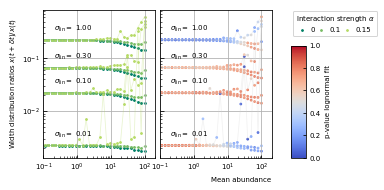

In [11]:
sigmas = [0.01, 0.1, 0.3, 1.0]

import matplotlib.cm as cm
cmap = matplotlib.cm.get_cmap('coolwarm') #viridis')

norm = matplotlib.colors.Normalize(vmin=0, vmax=0.21, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='summer')

fig = plt.figure(figsize=(ELIFE.TEXTWIDTH,2.5))

gs = gridspec.GridSpec(1,2, width_ratios=[5,5], right=0.7, top=0.95, wspace=0.05)
gs2 = gridspec.GridSpec(2,2, height_ratios=[1,5], width_ratios = [1,4], 
                        left=0.75, right=0.95, top=0.95)

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax_legend = fig.add_subplot(gs2[0:2])
ax_cbar = fig.add_subplot(gs2[2])

ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')

df1 = pd.read_csv('width_lognormal_fit_1.csv')
df2 = pd.read_csv('width_lognormal_fit_1_interaction0.05.csv')
df3 = pd.read_csv('width_lognormal_fit_1_interaction0.1.csv')
df4 = pd.read_csv('width_lognormal_fit_1_interaction0.15.csv')

#for i, df, alpha in zip(range(4), [df1, df2, df3, df4], [0, 0.05, 0.1, 0.15]):
for i, df, alpha in zip(range(3), [df1, df3, df4], [0, 0.1, 0.15]):
    for j, sigma in enumerate(sigmas):
        w = df['sigma_%.2f_width_mean' % sigma].values
        pval = df['sigma_%.2f_pval' % sigma].values
        ss = df['ss'].values
        
        col = mapper.to_rgba(alpha)
        
        ax.plot(ss, w, c=col, alpha=0.3) #, label=alpha if j==0 else "")
        ax.scatter(ss, w, c=col, label=alpha if j==0 else "", s=3)
        ax2.plot(ss, w, c='lightgrey', alpha=0.3) #, label=alpha if j==0 else "")
        s_ax2 = ax2.scatter(ss, w, s=3, c = pval, cmap=cmap, vmin=0, vmax=1)
        
        x = 2e-1 #ss.values[0]
        y = w[0]
        
        if i == 0:
            ax.annotate(r"$\sigma_\mathregular{lin} =$ %.2f" % sigma, xy=(x, y), xytext=(x, 1.5*y))
            ax2.annotate(r"$\sigma_\mathregular{lin} =$ %.2f" % sigma, xy=(x, y), xytext=(x, 1.5*y))

handles, labels = ax.get_legend_handles_labels()
ax_legend.legend(handles, labels, title='Interaction ' + r'strength $\alpha$', 
                 loc=2, ncol=3, columnspacing=0.5)
ax_legend.axis('off')

cbar = plt.colorbar(s_ax2, cax=ax_cbar)
cbar.set_label('p-value lognormal fit')

ax.set_xscale('log')
ax.set_ylabel('Width distribution ratios $x(t+\delta t) / x(t)$')
ax.set_xlim([1e-1,2e2])
#plt.ylim([-0.01,0.15])
ax.set_yscale('log')
ax.grid()

ax2.tick_params(axis='both', left=True, labelleft=False)
ax2.set_xscale('log')
ax2.set_xlabel(r'Mean abundance', ha='right', x=1)
#ax2.set_ylabel('Scale lognormal fit')
ax2.set_xlim([1e-1,2e2])
#plt.ylim([-0.01,0.15])
ax2.set_yscale('log')
ax2.grid()

plt.savefig('figures_elife/supplemental/interaction_lognormal_fit.pdf')
plt.show()

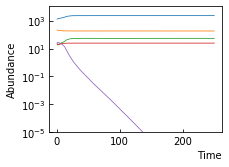

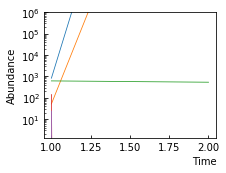

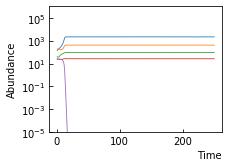

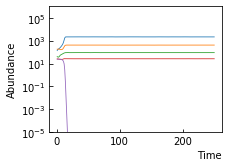

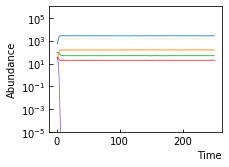

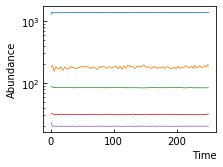

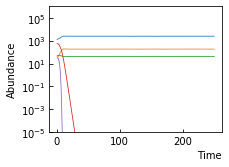

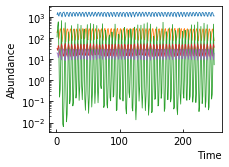

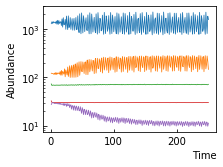

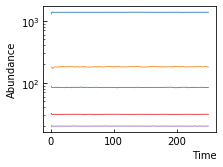

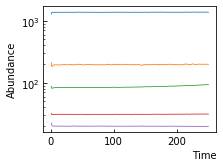

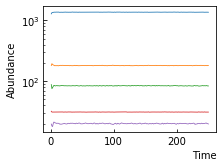

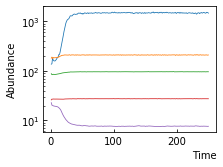

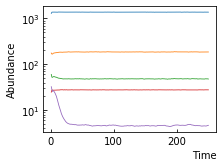

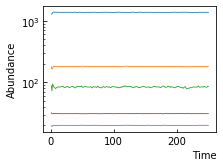

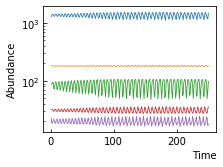

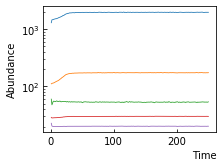

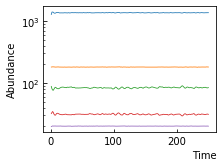

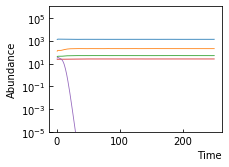

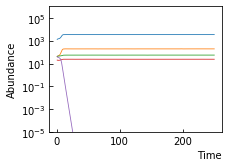

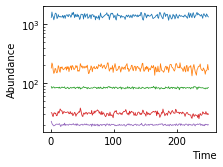

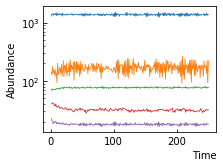

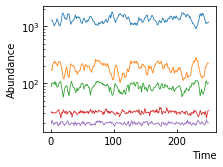

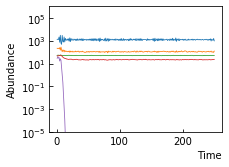

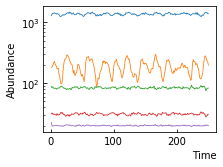

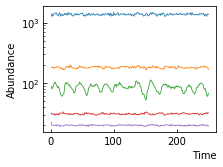

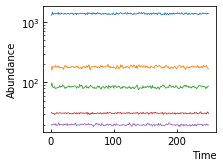

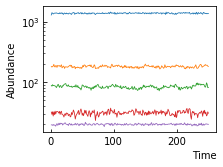

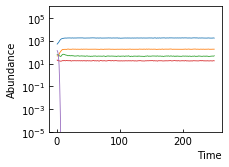

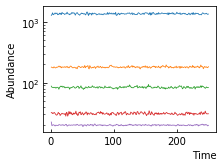

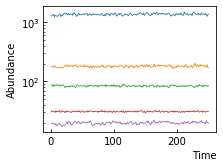

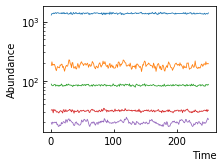

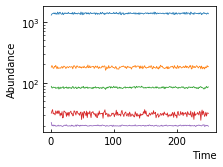

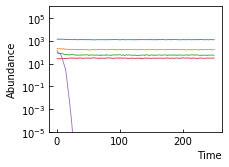

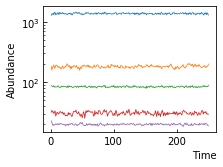

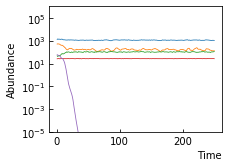

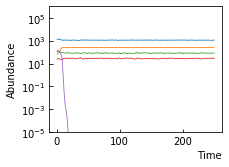

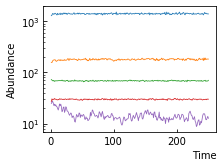

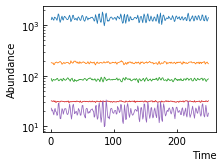

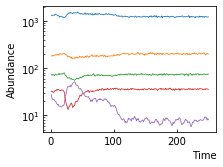

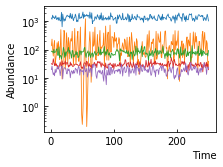

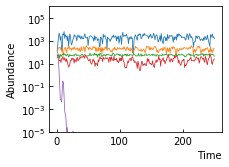

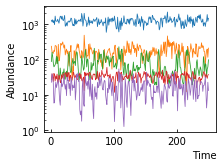

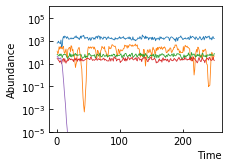

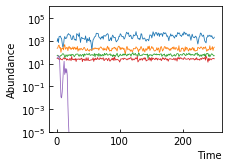

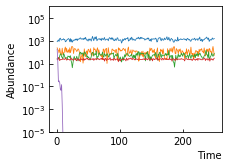

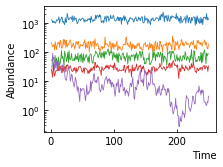

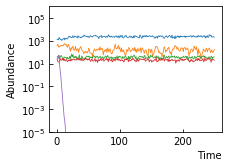

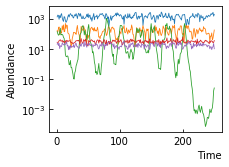

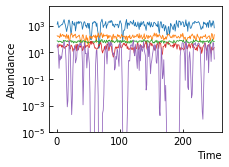

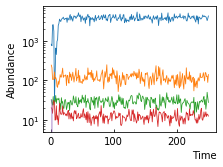

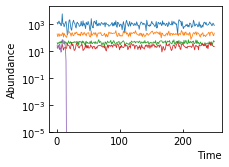

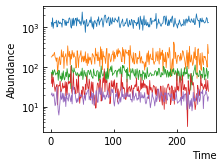

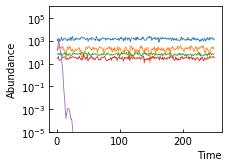

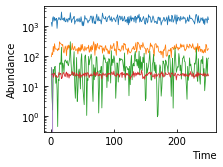

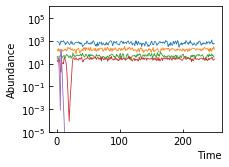

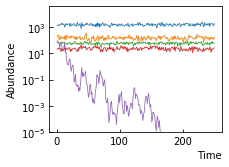

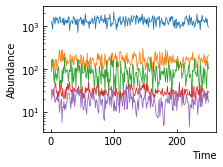

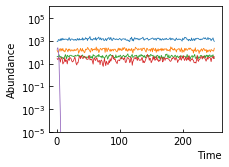

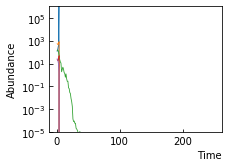

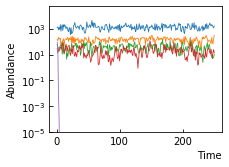

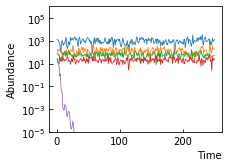

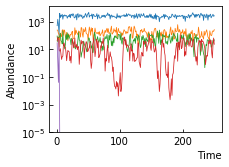

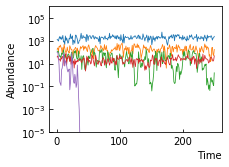

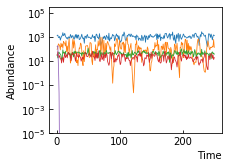

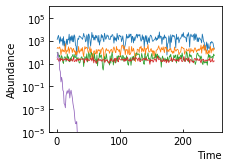

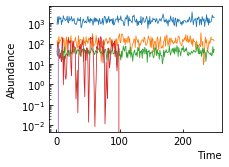

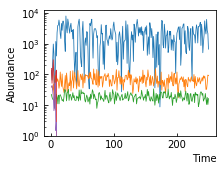

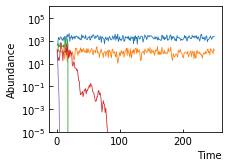

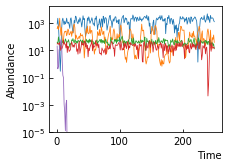

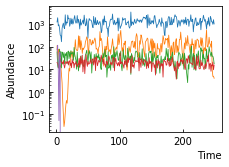

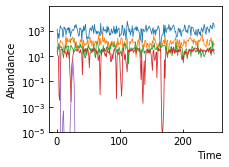

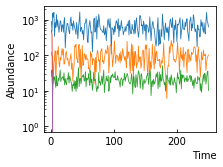

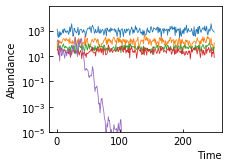

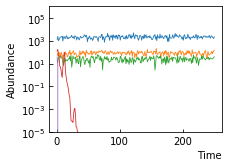

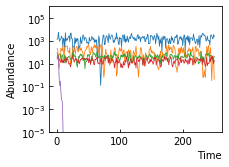

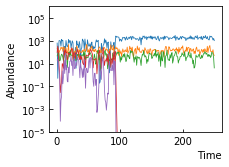

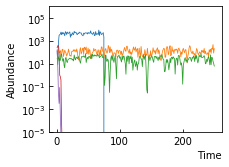

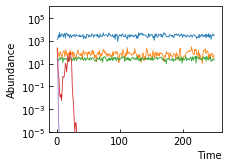

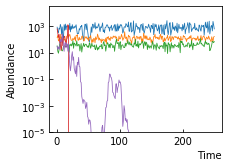

In [95]:
N = 50

# stool A
f = '../../Data/Faust/25_timeseries/25_timeseries.txt'
    # '../../Data/Faust/28_timeseries/28_timeseries.txt'

x = np.loadtxt(f).T #pd.read_csv(f, na_values='NAN', delimiter='\t', header=None)

x = x[150:,:] # do not consider the traveling

experimental_abundance = np.sort(x[0,:])[::-1]

experimental_noise_color = noise_slope(x.T)


ss = experimental_abundance[:N]

sigmas = [0.01, 0.1, 1.0, 2.0] #0.01, 0.1, 0.2, 0.25, 0.3]
interaction = 0.03

params = {}

steadystate = (experimental_abundance[:N]).reshape([N, 1])

selfints = -find_ss_selfint(experimental_noise_color['slope_linear'].values[:N]) / steadystate.flatten()

df = pd.DataFrame({'ss' : ss, 'selfints':-selfints})


# no immigration
params['immigration_rate'] = np.zeros([N, 1])

params['initial_condition'] = np.copy(steadystate) * np.random.normal(1,0.1,steadystate.shape)

for sigma in sigmas:
    def find_ss_selfint(x):
        amplitude = 2.10E+00 
        x0 = 2.87E+00
        k = 1.14E+00
        offset = -1.77E+00

        return 10**( -1/x0 * np.log(amplitude/(x-offset) - 1) + k)

    
    params['noise'] = sigma

    params['noise_linear'] = 0
    params['noise_sqrt'] = 0
    
    for repeat in range(20):
        # interaction
        if interaction == 0:
            omega = np.zeros([N,N])
        else:
            omega = np.random.normal(0,interaction, [N, N]); 
            omega *=  np.random.choice([0,1], omega.shape, p=[0.9, 0.1])
        np.fill_diagonal(omega, selfints)
        
        params['interaction_matrix'] = omega
        
        # different growthrates determined by the steady state
        params['growthrate'] = - (omega).dot(steadystate)

        ts = run_timeseries_noise(params, noise_implementation = NOISE.LANGEVIN_LINEAR, 
            dt = 0.01, tskip=19, T=50.0, seed=int(time.time()))
        ts.time = np.arange(1, len(ts)+1)
        
        plot_timeseries_comparison([ts], composition=['ts'])
        plt.show()
        
        multi_a = np.zeros(N)
        multi_pval = np.zeros(N)

        for i in range(N):
            x = ts['species_%d' % (i+1)].values

            x_transf = ratio(x)

            a, b, c, stat, pval = fit_ratio(x)

            multi_a[i] = a
            multi_pval[i] = pval

        df['sigma_%.2f_width_mean_%d' % (sigma, repeat)] = multi_a
        df['sigma_%.2f_pval_%d' % (sigma, repeat)] = multi_pval
    
df.to_csv('width_lognormal_fit_experimental_interaction2.csv')

In [75]:
df.head()

,selfints,ss,sigma_0.01_width_mean_0,sigma_0.01_pval_0,sigma_0.01_width_mean_1,sigma_0.01_pval_1,sigma_0.01_width_mean_2,sigma_0.01_pval_2,sigma_0.01_width_mean_3,sigma_0.01_pval_3,...,sigma_2.00_width_mean_15,sigma_2.00_pval_15,sigma_2.00_width_mean_16,sigma_2.00_pval_16,sigma_2.00_width_mean_17,sigma_2.00_pval_17,sigma_2.00_width_mean_18,sigma_2.00_pval_18,sigma_2.00_width_mean_19,sigma_2.00_pval_19
0,0.011047,1371.0,0.004433,0.009404,0.003275,8.862581e-01,0.003843,0.579300,0.002936,8.457727e-01,...,0.582037,0.673403,0.963820,0.833137,0.570308,0.908802,0.913041,0.449017,0.548355,0.884885
1,0.011164,783.0,0.006010,0.855348,0.004737,6.842732e-01,0.004305,0.194663,0.003905,7.588073e-01,...,1.235793,0.021712,0.939984,0.401517,1.346857,0.878914,1.240391,0.689582,1.249387,0.073207
2,0.017352,763.0,0.003632,0.774062,0.003098,5.732797e-01,0.004141,0.633258,0.004025,2.942538e-01,...,0.889438,0.003096,0.671617,0.781906,1.192853,0.742556,0.786431,0.866607,1.011359,0.047586
3,0.048697,533.0,0.008666,0.000000,0.008843,1.291638e-10,0.008514,0.000000,0.007915,1.403322e-13,...,0.484104,0.835353,0.406087,0.802117,0.583683,0.281899,0.546227,0.958490,0.483654,0.823195
4,0.017625,523.0,0.003503,0.990484,0.003120,9.841423e-01,0.004725,0.142487,0.003175,5.687001e-01,...,0.760342,0.451852,0.849173,0.996559,2.513152,0.766718,0.813375,0.670856,0.762127,0.860462


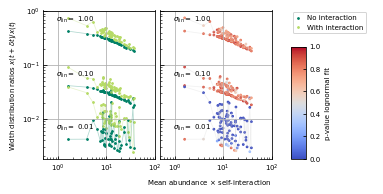

In [12]:
import matplotlib.cm as cm

sigmas = [0.01, 0.1, 1.0]

cmap = matplotlib.cm.get_cmap('coolwarm') #viridis')

norm = matplotlib.colors.Normalize(vmin=0, vmax=0.21, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='summer')

fig = plt.figure(figsize=(ELIFE.TEXTWIDTH,2.5))

gs = gridspec.GridSpec(1,2, width_ratios=[5,5], right=0.7, top=0.95, wspace=0.05)
gs2 = gridspec.GridSpec(2,2, height_ratios=[1,5], width_ratios = [1,4], 
                        left=0.75, right=0.95, top=0.95)

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax_legend = fig.add_subplot(gs2[0:2])
ax_cbar = fig.add_subplot(gs2[2])

ax.set_xscale('log')
ax.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')

dfs = [pd.read_csv('width_lognormal_fit_experimental.csv'),
    pd.read_csv('width_lognormal_fit_experimental_interaction2.csv')]

for i, df, alpha, label in zip(range(2), dfs, [0, 0.15], ['No interaction', 'With interaction']):
    for j, sigma in enumerate(sigmas):
        w = df[['sigma_%.2f_width_mean_%d' % (sigma, d) for d in range(20)]].median(axis=1).values
        pval = df[['sigma_%.2f_pval_%d' % (sigma, d) for d in range(20)]].median(axis=1).values
        ss = df['ss'].values
        si = df['selfints'].values

        x = ss * si

        p = x.argsort()

        x = x[p]
        w = w[p]
        pval = pval[p]
        ss = ss[p]
        si = si[p]

        col = mapper.to_rgba(alpha)

        ax.plot(x, w, c=col, alpha=0.3) #, label=alpha if j==0 else "")
        ax.scatter(x, w, c=col, label=label if j==0 else "", s=3)
        ax2.plot(x, w, c='lightgrey', alpha=0.3) #, label=alpha if j==0 else "")
        s_ax2 = ax2.scatter(x, w, s=3, c = pval, cmap=cmap, vmin=0, vmax=1)
                        #c=col, label=alpha if j==0 else "")
        x = 9e-1 #ss.values[0]
        y = w[0]

        if i == 0:
            ax.annotate(r"$\sigma_\mathregular{lin} =$ %.2f" % sigma, xy=(x, y), xytext=(x, 1.5*y))
            ax2.annotate(r"$\sigma_\mathregular{lin} =$ %.2f" % sigma, xy=(x, y), xytext=(x, 1.5*y))

handles, labels = ax.get_legend_handles_labels()
ax_legend.legend(handles, labels, loc=2)
ax_legend.axis('off')

cbar = plt.colorbar(s_ax2, cax=ax_cbar)
cbar.set_label('p-value lognormal fit')

ax.set_xscale('log')
ax.set_ylabel('Width distribution ratios $x(t + \delta t) / x(t)$')
ax.set_xlim([5e-1,1e2])
#plt.ylim([-0.01,0.15])
ax.set_yscale('log')
ax.grid()

ax2.tick_params(axis='both', left=True, labelleft=False)
ax2.set_xscale('log')
ax2.set_xlabel(r'Mean abundance $\times$ self-interaction', ha='right', x=1)
#ax2.set_ylabel('Scale lognormal fit')
ax2.set_xlim([5e-1,1e2])
#plt.ylim([-0.01,0.15])
ax2.set_yscale('log')
ax2.grid()

plt.savefig('figures_elife/supplemental/interaction_lognormal_fit_lognormal.pdf')
plt.show()

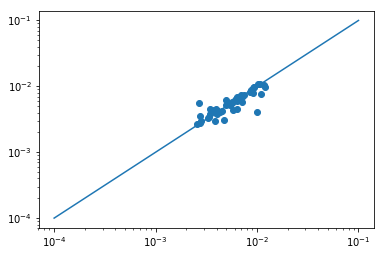

In [53]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df['sigma_0.01_width_mean_0'], df['sigma_0.01_width_mean_2'])
plt.plot([1e-4,1e-1], [1e-4,1e-1])
plt.show()